# Read SWMM result files

In this notebook we give examples how to read SWMM result files **out**. Most of the functionality is the same as reading res1d files, which is described in [res1d.ipynb](res1d.ipynb).

In [1]:
from mikeio1d import Res1D
from mikeio1d.query import QueryDataNode, QueryDataReach, QueryDataCatchment

## SWMM out file

Read entire res file into a data frame. Here we use results from a standard **Example1.inp** distributed together with EPA SWMM 5.1.

In [2]:
file_path = "../tests/testdata/Swmm.out"
res = Res1D(file_path)
df = res.read()

Let's peek at the full data frame coming from EPANET result.

In [3]:
df.head()

,SWMM_NODE_DEPTH:9,SWMM_NODE_HEAD:9,SWMM_NODE_VOLUME:9,SWMM_NODE_LATFLOW:9,SWMM_NODE_INFLOW:9,SWMM_NODE_OVERFLOW:9,SWMM_NODE_QUAL:9,SWMM_NODE_QUAL:9,SWMM_NODE_DEPTH:10,SWMM_NODE_HEAD:10,...,SWMM_SYS_DWFLOW:,SWMM_SYS_GWFLOW:,SWMM_SYS_INFLOW:,SWMM_SYS_EXFLOW:,SWMM_SYS_INFLOW:,SWMM_SYS_FLOODING:,SWMM_SYS_OUTFLOW:,SWMM_SYS_STORAGE:,SWMM_SYS_EVAP:,SWMM_SYS_PET:
1998-01-01 01:00:00,0.000000,1000.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,995.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1998-01-01 02:00:00,0.288774,1000.288757,0.0,1.239633,1.239633,0.0,15.720075,3.144015,0.520309,995.520325,...,0.0,0.0,0.0,0.0,6.216826,0.000000,6.128909,1656.397217,0.0,0.0
1998-01-01 03:00:00,0.418453,1000.418457,0.0,2.595429,2.595429,0.0,15.389509,3.077902,3.000000,998.000000,...,0.0,0.0,0.0,0.0,13.030855,0.521967,12.470544,2796.561035,0.0,0.0
1998-01-01 04:00:00,0.567633,1000.567627,0.0,4.645479,4.645479,0.0,14.810841,2.962168,3.000000,998.000000,...,0.0,0.0,0.0,0.0,24.252975,4.511855,19.521162,3780.683594,0.0,0.0
1998-01-01 05:00:00,0.425047,1000.425049,0.0,2.675368,2.675368,0.0,14.338782,2.867756,3.000000,998.000000,...,0.0,0.0,0.0,0.0,14.172027,0.555154,13.623661,2913.430420,0.0,0.0


For SWMM there quite a lot of available quantities:

In [4]:
res.quantities

['SWMM_NODE_DEPTH',
 'SWMM_NODE_HEAD',
 'SWMM_NODE_VOLUME',
 'SWMM_NODE_LATFLOW',
 'SWMM_NODE_INFLOW',
 'SWMM_NODE_OVERFLOW',
 'SWMM_NODE_QUAL',
 'SWMM_LINK_FLOW',
 'SWMM_LINK_DEPTH',
 'SWMM_LINK_VELOCITY',
 'SWMM_LINK_Froude_Number',
 'SWMM_LINK_CAPACITY',
 'SWMM_LINK_QUAL',
 'SWMM_SUBCATCH_RAINFALL',
 'SWMM_SUBCATCH_SNOWDEPTH',
 'SWMM_SUBCATCH_EVAP',
 'SWMM_SUBCATCH_INFIL',
 'SWMM_SUBCATCH_RUNOFF',
 'SWMM_SUBCATCH_GW_FLOW',
 'SWMM_SUBCATCH_GW_ELEV',
 'SWMM_SUBCATCH_SOIL_MOIST',
 'SWMM_SUBCATCH_WASHOFF',
 'SWMM_SYS_TEMPERATURE',
 'SWMM_SYS_RAINFALL',
 'SWMM_SYS_SNOWDEPTH',
 'SWMM_SYS_INFIL',
 'SWMM_SYS_RUNOFF',
 'SWMM_SYS_DWFLOW',
 'SWMM_SYS_GWFLOW',
 'SWMM_SYS_INFLOW',
 'SWMM_SYS_EXFLOW',
 'SWMM_SYS_FLOODING',
 'SWMM_SYS_OUTFLOW',
 'SWMM_SYS_STORAGE',
 'SWMM_SYS_EVAP',
 'SWMM_SYS_PET']

Here we retrieve flow in a pipe with ID **10**, which has connecting junctions **17** and **18**. Note that in order to have network connectivity the corresponding setup **inp** file is needed, which has to be called the same as the result file, i.e., for **Swmm.out** we need to have **Swmm.inp** with the relevant network information.

In [5]:
pipe_id = '10'
pipe_data_item = res.reaches[pipe_id]
node_start = res.data.Nodes[pipe_data_item.StartNodeIndex]
node_end = res.data.Nodes[pipe_data_item.EndNodeIndex]
print(f'Start node ID: {node_start.ID}')
print(f'End node ID: {node_end.ID}')

Start node ID: 17
End node ID: 18


In [6]:
df[['SWMM_LINK_FLOW:10', 'SWMM_NODE_DEPTH:17', 'SWMM_NODE_DEPTH:18']].head()

,SWMM_LINK_FLOW:10,SWMM_NODE_DEPTH:17,SWMM_NODE_DEPTH:18
1998-01-01 01:00:00,0.000000,0.000000,0.000000
1998-01-01 02:00:00,5.876935,0.607021,0.572612
1998-01-01 03:00:00,11.923845,0.886635,0.833084
1998-01-01 04:00:00,18.203714,1.139519,1.063005
1998-01-01 05:00:00,12.643229,0.916358,0.860591


Let's plot the above results, but this time we will retrieve the data using **QueryDataReach** and **QueryDataNode**. 

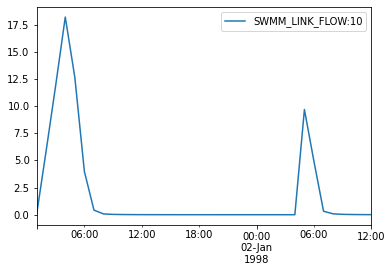

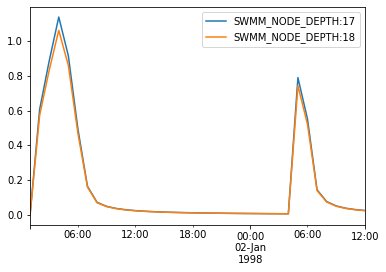

In [7]:
pipe_query = QueryDataReach('SWMM_LINK_FLOW', pipe_id)
df_pipe = res.read(queries=[pipe_query])
df_pipe.plot();

node_start_query = QueryDataNode('SWMM_NODE_DEPTH', node_start.ID)
node_end_query = QueryDataNode('SWMM_NODE_DEPTH', node_end.ID)
df_nodes = res.read(queries=[node_start_query, node_end_query])
df_nodes.plot();

Finally, the catchment results are also stored in SWMM out file. The current result file has the following catchments:

In [8]:
res.catchments

{'1': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A4B63100>,
 '2': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A6CD5540>,
 '3': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A7D401C0>,
 '4': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A7D40E40>,
 '5': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A7D40F80>,
 '6': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A7D40FC0>,
 '7': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A7D40200>,
 '8': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000001E3A7D3F9C0>}

Available quantities for catchments can be obtained from one of the catchments (for example, `ID='5'`) as

In [9]:
catchment_id = '5'
swmm_catchment = res.catchments[catchment_id]
catchment_quantities = [data_item.Quantity.Id for data_item in swmm_catchment.DataItems]
print(catchment_quantities)

['SWMM_SUBCATCH_RAINFALL', 'SWMM_SUBCATCH_SNOWDEPTH', 'SWMM_SUBCATCH_EVAP', 'SWMM_SUBCATCH_INFIL', 'SWMM_SUBCATCH_RUNOFF', 'SWMM_SUBCATCH_GW_FLOW', 'SWMM_SUBCATCH_GW_ELEV', 'SWMM_SUBCATCH_SOIL_MOIST', 'SWMM_SUBCATCH_WASHOFF', 'SWMM_SUBCATCH_WASHOFF']


We can create quantity `'SWMM_SUBCATCH_RUNOFF'` queries for all catchments as

In [10]:
catchment_queries = [QueryDataCatchment('SWMM_SUBCATCH_RUNOFF', catchment_id) for catchment_id in res.catchments]
df_catchments = res.read(queries=catchment_queries)

In [11]:
df_catchments.head()

,SWMM_SUBCATCH_RUNOFF:1,SWMM_SUBCATCH_RUNOFF:2,SWMM_SUBCATCH_RUNOFF:3,SWMM_SUBCATCH_RUNOFF:4,SWMM_SUBCATCH_RUNOFF:5,SWMM_SUBCATCH_RUNOFF:6,SWMM_SUBCATCH_RUNOFF:7,SWMM_SUBCATCH_RUNOFF:8
1998-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-01-01 02:00:00,1.243824,1.243824,0.629613,0.629613,1.814816,0.302342,0.100822,0.251970
1998-01-01 03:00:00,2.597976,2.563968,1.302650,1.302650,3.821663,0.649161,0.244563,0.548222
1998-01-01 04:00:00,4.656198,4.524055,2.449128,2.449128,6.562110,1.495427,0.789465,1.327465
1998-01-01 05:00:00,2.675617,2.511513,1.369764,1.369764,3.585666,1.082219,0.596153,0.981333


Let's plot the runoff for catchment `ID='5'`

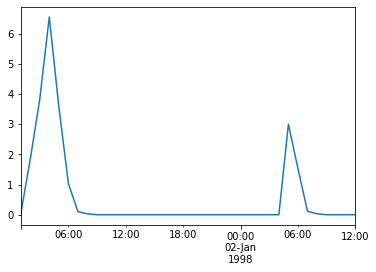

In [12]:
df_catchments['SWMM_SUBCATCH_RUNOFF:5'].plot();